<a href="https://colab.research.google.com/github/wilferalexander/Covid19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**COVID-19 ANALISIS**

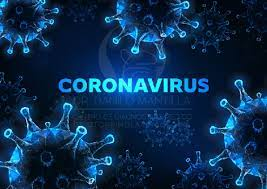


El COVID-19, también conocido como enfermedad por coronavirus 2019, es una enfermedad infecciosa causada por el virus SARS-CoV-2, un tipo de coronavirus que fue identificado por primera vez en diciembre de 2019 en la ciudad de Wuhan, en la provincia de Hubei, China. El término "COVID-19" se deriva de "COronaVIrus Disease 2019".

La enfermedad se propagó rápidamente a nivel mundial, llevando a la Organización Mundial de la Salud (OMS) a declararla como una pandemia el 11 de marzo de 2020. El COVID-19 se caracteriza por síntomas que pueden variar desde leves, como fiebre y tos, hasta síntomas más graves, como dificultades respiratorias, neumonía y, en casos extremos, puede llevar a la muerte.

El virus se propaga principalmente a través de las gotas respiratorias que se generan cuando una persona infectada tose, estornuda o habla. También puede transmitirse al tocar superficies contaminadas y luego tocarse la cara. La pandemia tuvo un impacto significativo en la salud pública, la economía global y la vida cotidiana de las personas en todo el mundo. Se implementaron medidas de distanciamiento social, cuarentenas y restricciones de viaje para frenar la propagación del virus.

La investigación científica y los esfuerzos globales llevaron al desarrollo y aprobación de vacunas contra el COVID-19 para prevenir la enfermedad y reducir su gravedad. La situación con respecto al COVID-19 sigue siendo dinámica, y las medidas para abordar la pandemia continúan evolucionando a medida que se obtiene más información y se implementan estrategias de salud pública.


#**PROBLEMA DE NEGOCIO**


---

Una entidad gubernamental responsable de la gestión de la salud en un país enfrenta el desafío de comprender y analizar la propagación del COVID-19 para tomar decisiones informadas y eficaces en la gestión de la pandemia. Como científico de datos, tu tarea es analizar los datos relacionados con el COVID-19 y presentar insights a través de visualizaciones que respondan a las siguientes preguntas clave:

### **Preguntas**

1. ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?

2. ¿Cuál ha sido la evolución de los nuevos casos diarios reportados de Covid-19 en el país a lo largo del tiempo?

3. ¿Cuál es la evolución del índice de letalidad del Covid-19 en el país, comparado con los países con los índices históricos más elevados?

4. Desde una perspectiva demográfica, ¿cuáles son las características que tienen un mayor impacto en el índice de letalidad de un país?

5. ¿Existe


para validar nuestros datos

https://data.who.int/dashboards/covid19/cases

https://population.un.org/wpp/Graphs/DemographicProfiles/Line/900

https://www.worldometers.info/coronavirus/worldwide-graphs/





#**1.  Configuración del ambiente**

In [1]:
!python -V
print('------')
!pip show Pandas | grep 'Name\|Version'
print('------')
!pip show Matplotlib | grep 'Name\|Version'

Python 3.10.12
------
Name: pandas
Version: 1.5.3
------
Name: matplotlib
Version: 3.7.1


#**2. Obtención, Tratamiento y Análisis Exploratorio (EDA)**

En este paso vamos a realizar limpieza de datos, manejar valores faltantes, análisis exploratorio, etc.

In [1]:
#Importamos librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import warnings
%matplotlib inline
from io import StringIO
import requests
import sklearn
import missingno as msno ## Importamos la Librería Missingno, para poder visualizar nuestros valores nulos presentes

#theme
theme = ["#DEF5E5", "#459E97", "#4B9ABB","#0A4361","#E68193",]

Cargando las bases de datos

En este paso vamos a cargar dos bases de datos:

Base con informaciones de evolución del Covid19 de World Health Organization, guardaremos esto en df_covid.

Base con informaciones demográficas de Population United Nations, guardaremos en df_populationy filtraremos un año para análisis.

In [2]:
#Importamos los dataset
df_covid = pd.read_csv(StringIO(requests.get("https://covid19.who.int/WHO-COVID-19-global-data.csv").text))
df_population = pd.read_excel('https://raw.githubusercontent.com/ElProfeAlejo/Bootcamp_Databases/main/WPP2022_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT_REV1.xlsx', sheet_name=0, skiprows=16)
df_population = df_population[df_population['Year'] == 2019]

In [4]:
#Validamos con un sample el dataset de covid
df_covid.sample(8)

Date_reported Country_code                           Country WHO_region  \
25448    2020-03-01           LA  Lao People's Democratic Republic       WPRO   
37640    2022-03-27           MD               Republic of Moldova       EURO   
34033    2022-03-06           MP          Northern Mariana Islands       WPRO   
7375     2023-03-19           CV                        Cabo Verde       AFRO   
1275     2020-01-26           AI                          Anguilla       AMRO   
394      2023-07-02           AL                           Albania       EURO   
13847    2021-04-18           SV                       El Salvador       AMRO   
20797    2020-05-31           HU                           Hungary       EURO   

       New_cases  Cumulative_cases  New_deaths  Cumulative_deaths  
25448        NaN                 0         NaN                  0  
37640     2142.0            512602        28.0              11417  
34033      612.0             10126         NaN                 30  
7375         7.0             63252         NaN                413  
1275         NaN                 0         NaN                  0  
394          NaN            334090         NaN               3604  
13847     1913.0             67404        24.0               2072  
20797      126.0              3867        38.0                524

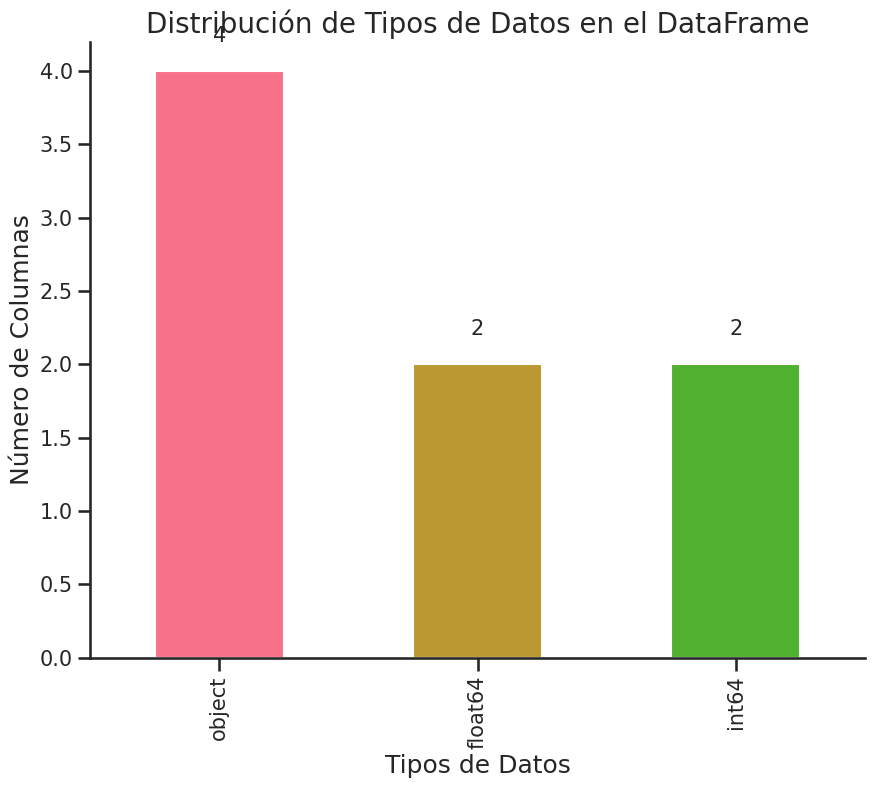

In [5]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_covid.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

graficamos los tipo de datos que tenemos en el dataset para visualizar de manera mas grafica
1. Categoricas tenemos 4
2. Float 2
3. enteras 2

In [6]:
#Información de los datos
print("Número de filas: ",df_covid.shape[0])
print("Número de Columnas:",df_covid.shape[1])
print("Datos Duplicados",df_covid.duplicated().sum())
print("Variables Categóricas: ",df_covid.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_covid.select_dtypes(exclude='object').shape[1])

Número de filas:  50880
Número de Columnas: 8
Datos Duplicados 211
Variables Categóricas:  4
Variables Numéricas:  4


In [7]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50880 entries, 0 to 50879
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      50880 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49608 non-null  object 
 3   WHO_region         45792 non-null  object 
 4   New_cases          36622 non-null  float64
 5   Cumulative_cases   50880 non-null  int64  
 6   New_deaths         24216 non-null  float64
 7   Cumulative_deaths  50880 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 3.1+ MB



el set de datos contienen la siguiente informacion

1. Número de filas:  50880
2. Número de Columnas: 8
3. Datos Duplicados 211
4. Variables Categóricas:  4
5. Variables Numéricas:  4

Podemos observa que tenemos valores nulos


### 2.1 Tratamiento de Valores nulos

In [8]:
#datos nulos por columna
df_covid.isnull().sum().sort_values(ascending=False)

New_deaths           26664
New_cases            14258
WHO_region            5088
Country_code          1484
Country               1272
Date_reported            0
Cumulative_cases         0
Cumulative_deaths        0
dtype: int64

* Observamos que existe presencia de datos nulos.
* Tenemos que validar la relación que existen entre datos nulos.
* La presencia de datos nulos en variables como 'country_code' y 'country', nos generan alerta, ya que de no tener datos para estas columnas, esto no generaría valor para el dataset.
* Se evaluará la posibilidad de eliminar ciertas filas que tengan presencia de valores nulos.

Text(0, 0.5, 'Filas')

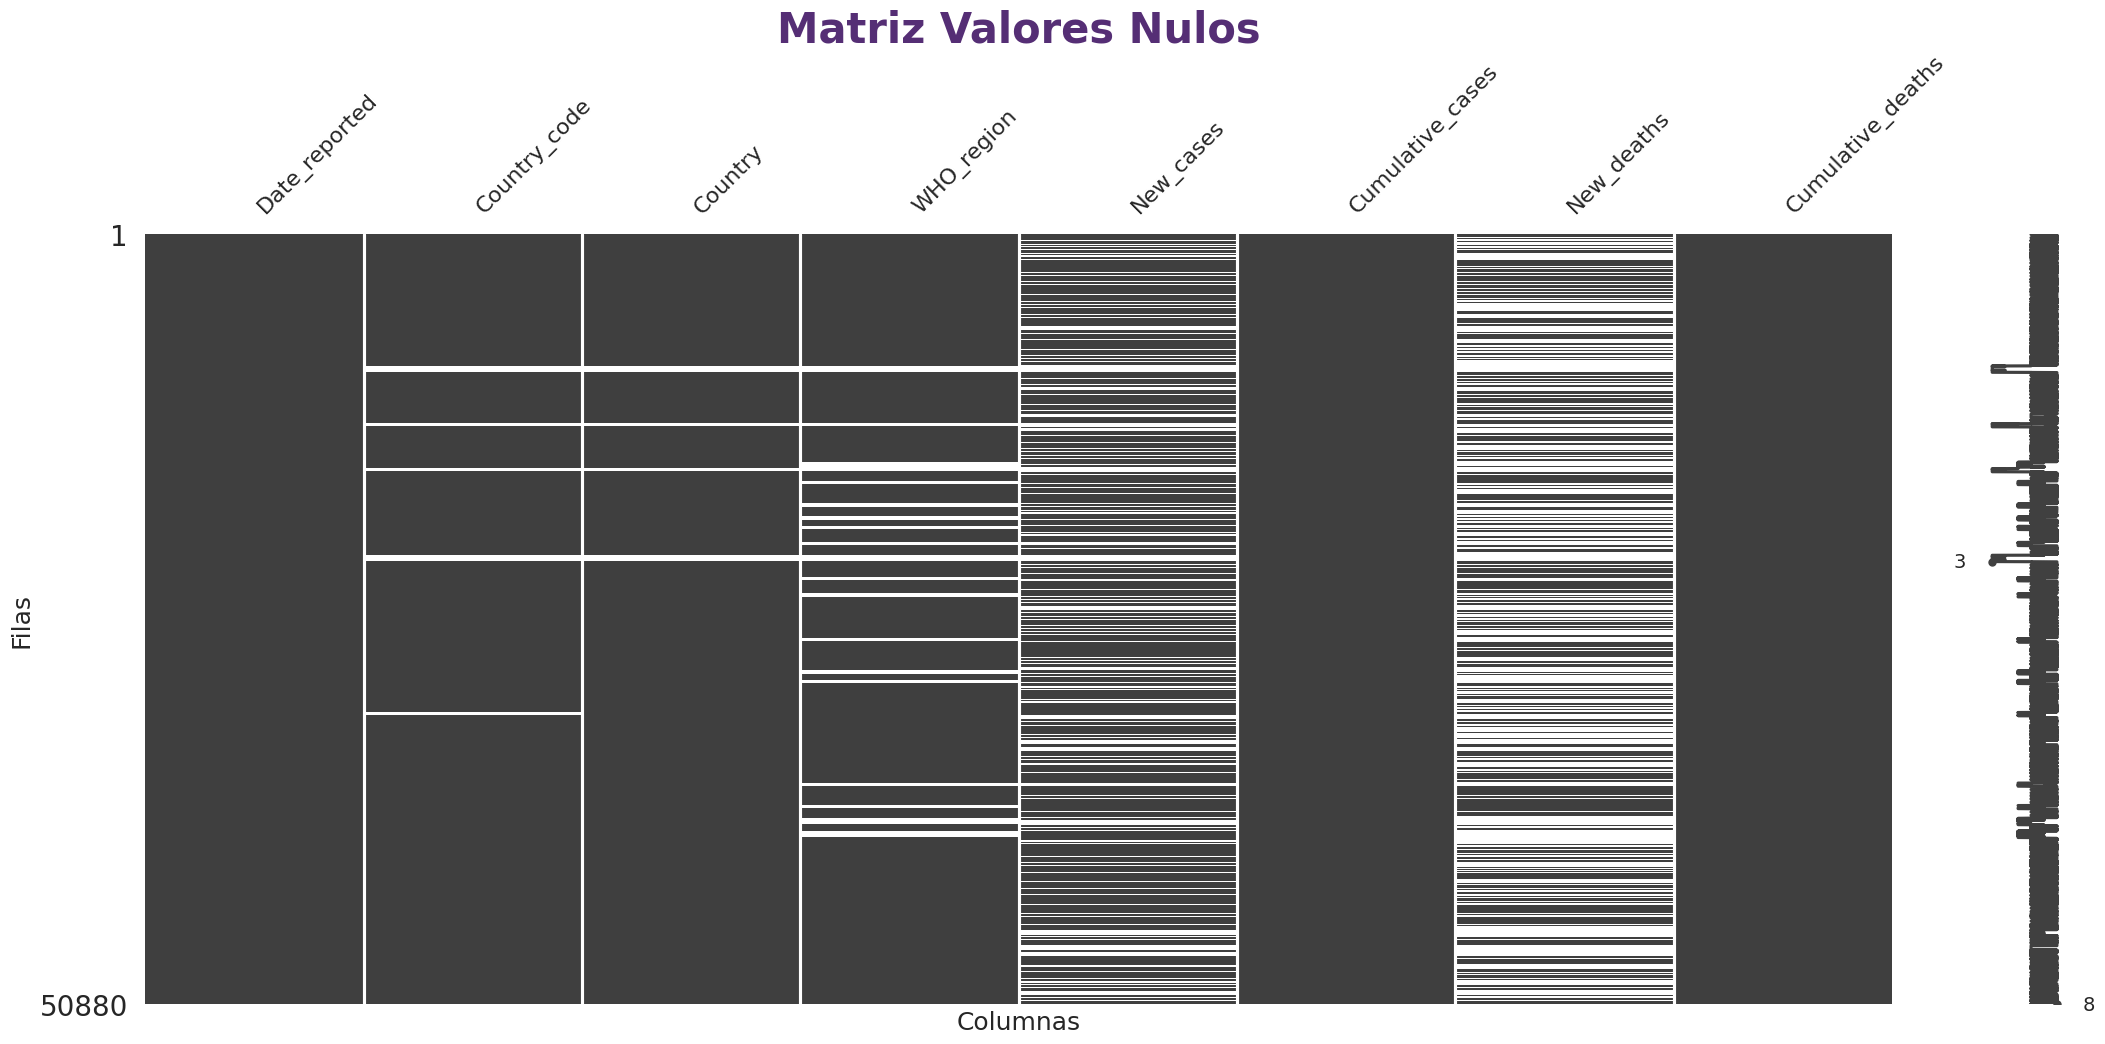

In [17]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Logramos evidenciar que las siguientes variables como New_deaths,New_cases,WHO_region tienen varios valores nulos pero es logico poque son las muertes nuevas y casos nuevos y en que regio las cuales estan altamente correlacionadas

tambien podemos determinar que los nulos para country code y country es pequeña y no deberia afectar mucho nuestro analisis



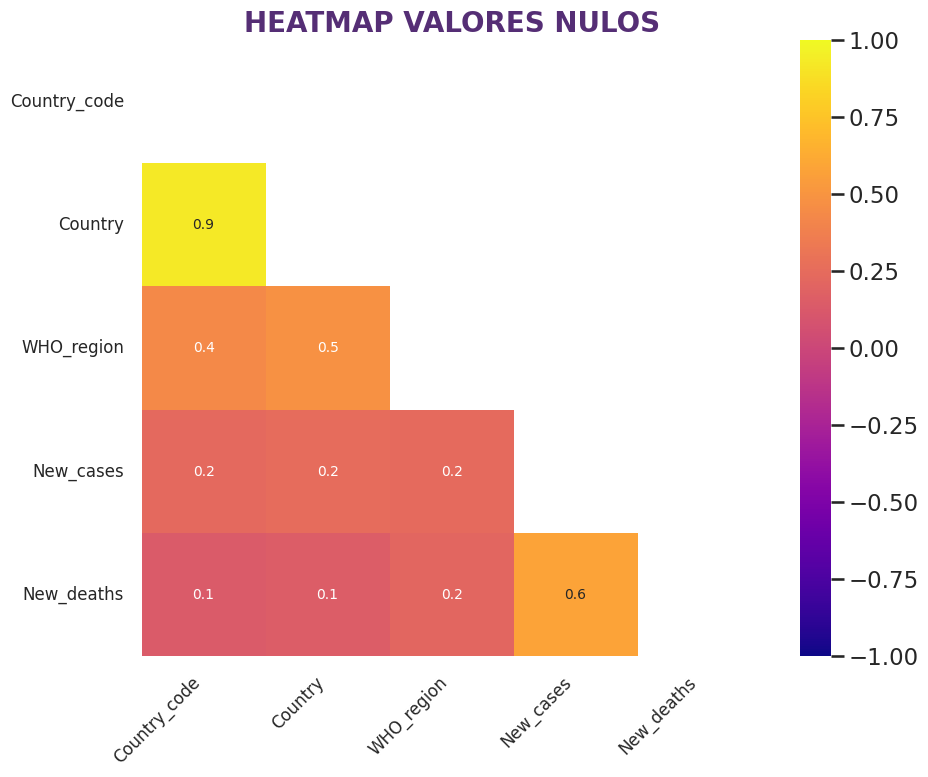

In [18]:
msno.heatmap(df_covid,cmap='plasma',
    vmin=-1,
    vmax=1,
    cbar=True,
    figsize=(10, 8),
    fontsize=12)
plt.title('HEATMAP VALORES NULOS',fontdict={'fontsize': 20, 'fontweight': 'bold', 'color': '#552E75'})
plt.show()

Este mapa de calor nos permite observar la relación clara entre country y country code

In [20]:
#Identificar los valores unicos por columna
df_covid.nunique()

Date_reported          212
Country_code           233
Country                234
WHO_region               6
New_cases            11877
Cumulative_cases     31717
New_deaths            2126
Cumulative_deaths    13650
dtype: int64

In [ ]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Filtrar solo la columna deseada
columna_filtrada = df_covid[nombre_columna_deseada]
# Mostrar los primeros 5 elementos aleatorios
columna_filtrada.sample(5)

28844     MQ
8353      CF
10217     CK
50        AF
21522    NaN
Name: Country_code, dtype: object

In [21]:
#filtramos la columna 'Country_code'
nombre_columna_deseada = 'Country_code'
# Contar valores nulos en la columna deseada
cantidad_nulos = df_covid[nombre_columna_deseada].isnull().sum()
# Mostrar la cantidad de valores nulos
print(f"La columna '{nombre_columna_deseada}' tiene {cantidad_nulos} valores nulos.")

La columna 'Country_code' tiene 1484 valores nulos.


Mantener en el dataframe sólo las siguientes columnas:
1. 'Date_reported'
2. 'Country_code'
3. 'Country'
4. 'New_cases'
5. 'Cumulative_cases'
6. 'New_deaths'
7. 'Cumulative_deaths'

In [22]:
# Listamos de columnas que deseas mantener
columnas_a_mantener = ['Date_reported', 'Country_code', 'Country', 'New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_covid_limpio = df_covid[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code  \
37764    2020-07-19           RE   
39090    2021-08-01           KN   
24903    2021-11-28           XK   
2684     2022-09-11           AT   
36955    2021-04-18           PR   

                                                 Country  New_cases  \
37764                                            Réunion       47.0   
39090                              Saint Kitts and Nevis       30.0   
24903  Kosovo (in accordance with UN Security Council...       76.0   
2684                                             Austria    28946.0   
36955                                        Puerto Rico     7458.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
37764               624         NaN                  3  
39090               593         NaN                  3  
24903            161032         1.0               2973  
2684            4980755        52.0              20686  
36955            129359        54.0               2233



1.   Eliminar todos los registros con nulos en la columna Country_code. y crearemos el dataset df_covid_limpio




In [23]:
# Filtramos por Country_code
columna_a_filtrar = 'Country_code'
# Eliminamos registros con valores nulos en la columna 'Country_code' y creamos un dataset nuevo
df_covid_limpio = df_covid_limpio.dropna(subset=[columna_a_filtrar])
# mostraoms información del DataFrame resultante
print("Información de df_covid_limpio después de eliminar nulos en 'Country_code':")
print(df_covid_limpio.info())

Información de df_covid_limpio después de eliminar nulos en 'Country_code':
<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          36436 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         24088 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB
None


Text(0, 0.5, 'Filas')

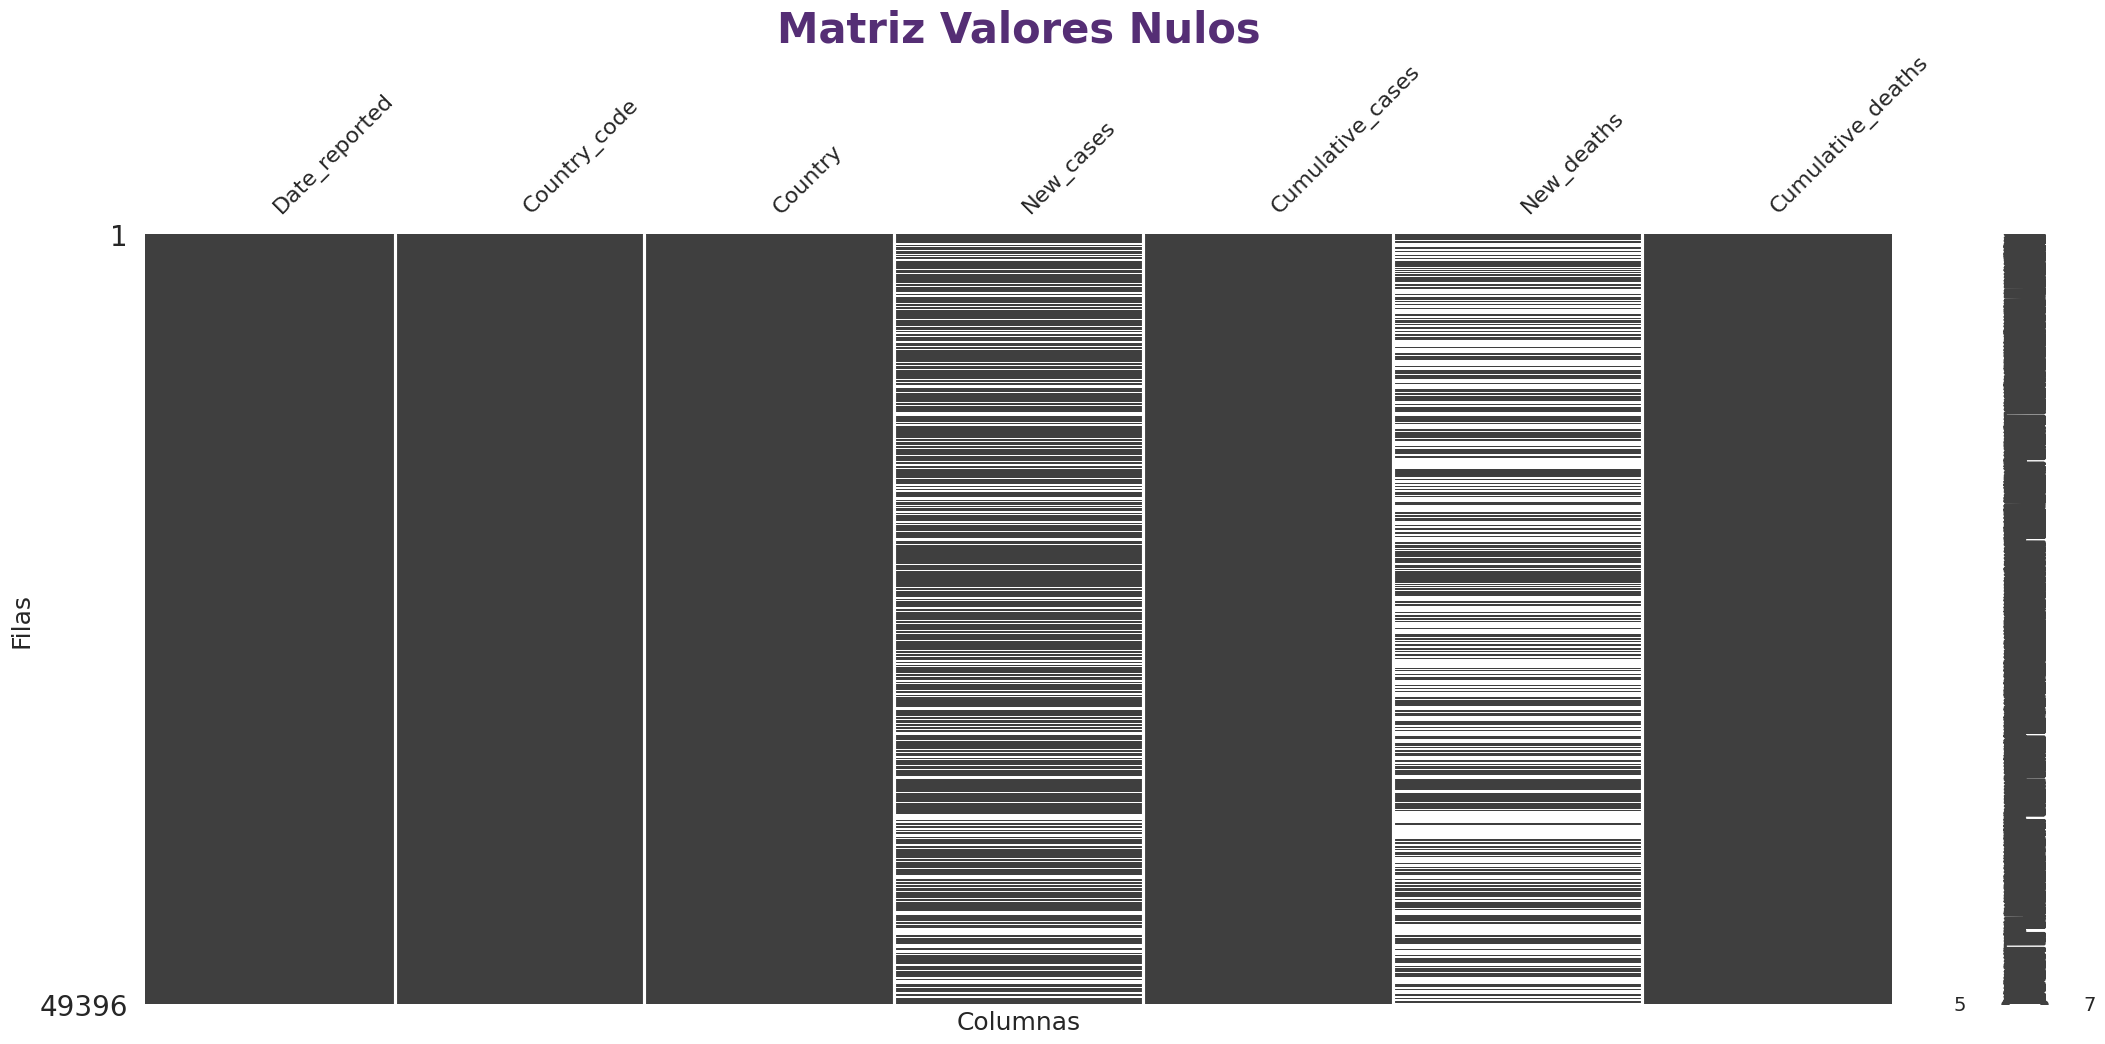

In [26]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_covid_limpio)
plt.title('Matriz Valores Nulos', fontdict={'fontsize': 30, 'fontweight': 'bold', 'color': '#552E75'})
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir todos los valores nulos con cero.

In [27]:
# Reemplazamos todos los valores nulos con cero en el DataFrame
df_covid_limpio = df_covid_limpio.fillna(0)
# Mostramos las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code           Country  New_cases  \
38754    2023-04-09           BL  Saint Barthélemy        0.0   
32656    2020-03-01           NZ       New Zealand        1.0   
41826    2021-03-14           SG         Singapore       72.0   
10426    2020-09-27           CR        Costa Rica     8442.0   
41460    2022-04-24           SC        Seychelles      425.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
38754              5478         0.0                  5  
32656                 1         0.0                  0  
41826             60105         0.0                 29  
10426             70816       126.0                812  
41460             42276         0.0                163

In [31]:
# Imprimir las diferencias
df_covid_limpio.shape, df_covid.shape

((49396, 7), (50880, 8))

Cambiar el formato actual de la columna Date_reported para un formato de tipo datetime64[ns]

In [32]:
df_covid_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49396 entries, 0 to 50879
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date_reported      49396 non-null  object 
 1   Country_code       49396 non-null  object 
 2   Country            49396 non-null  object 
 3   New_cases          49396 non-null  float64
 4   Cumulative_cases   49396 non-null  int64  
 5   New_deaths         49396 non-null  float64
 6   Cumulative_deaths  49396 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 3.0+ MB


In [33]:
# Verificamos el tipo de dato actual de la columna Date_reported
print("Tipo de dato actual de Date_reported:", df_covid_limpio['Date_reported'].dtype)
# Convertir la columna Date_reported a datetime64
df_covid_limpio['Date_reported'] = pd.to_datetime(df_covid_limpio['Date_reported'], format='%Y-%m-%d')
# Verificamos el tipo de dato después de la conversión
print("Tipo de dato después de la conversión:", df_covid_limpio['Date_reported'].dtype)
df_covid_limpio.sample(5)

Tipo de dato actual de Date_reported: object
Tipo de dato después de la conversión: datetime64[ns]


Date_reported Country_code             Country  New_cases  \
17044    2021-08-15           GM              Gambia      432.0   
21134    2022-10-23           IS             Iceland      324.0   
38192    2020-08-16           RU  Russian Federation    35317.0   
36267    2020-04-19           PN            Pitcairn        0.0   
41686    2022-07-31           SL        Sierra Leone        5.0   

       Cumulative_cases  New_deaths  Cumulative_deaths  
17044              9195        26.0                271  
21134            204600         0.0                117  
38192            922853       754.0              15685  
36267                 0         0.0                  0  
41686              7733         0.0                125

Substituir el formato actual de las columnas ['New_cases', 'New_deaths']para un formato de tipo int64.

In [34]:
# convertimos las columnas 'New_cases' y 'New_deaths' a tipo int64
df_covid_limpio['New_cases'] = pd.to_numeric(df_covid_limpio['New_cases'], errors='coerce', downcast='integer')
df_covid_limpio['New_deaths'] = pd.to_numeric(df_covid_limpio['New_deaths'], errors='coerce', downcast='integer')
# Convertir explícitamente a int64
df_covid_limpio['New_cases']= df_covid_limpio['New_cases'].astype('Int64')
df_covid_limpio['New_deaths']= df_covid_limpio['New_deaths'].astype('Int64')
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de New_cases:", df_covid_limpio['New_cases'].dtype)
print("Tipo de dato después de la conversión de New_deaths:", df_covid_limpio['New_deaths'].dtype)

Tipo de dato después de la conversión de New_cases: Int64
Tipo de dato después de la conversión de New_deaths: Int64


Crear una nueva columna 'lethality_rate' con la siguiente fórmula: 'Cumulative_deaths'/'Cumulative_cases'*100

In [35]:
# Asegúramos de que las columnas 'Cumulative_deaths' y 'Cumulative_cases' sean de tipo numérico
df_covid_limpio['Cumulative_deaths'] = pd.to_numeric(df_covid_limpio['Cumulative_deaths'], errors='coerce')
df_covid_limpio['Cumulative_cases'] = pd.to_numeric(df_covid_limpio['Cumulative_cases'], errors='coerce')
# Crear la nueva columna 'lethality_rate'
df_covid_limpio['lethality_rate'] =(df_covid_limpio['Cumulative_deaths']/df_covid_limpio['Cumulative_cases'])*100
df_covid_limpio.sample(5)

Date_reported Country_code                   Country  New_cases  \
32152    2022-09-11           NP                     Nepal        875   
23958    2020-01-19           JO                    Jordan          0   
95       2021-10-31           AF               Afghanistan        270   
48603    2021-01-24           US  United States of America    1265861   
18939    2021-05-16           GU                      Guam         41   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
32152            998743           7              12014        1.202912  
23958                 0           0                  0             NaN  
95               156088          19               7272        4.658910  
48603          24794408       22495             429874        1.733754  
18939              7856           0                139        1.769348

Vamos a convertir en 0 los valores nulos en la columna lethality_rate

In [37]:
df_covid_limpio = df_covid_limpio.fillna(0)
df_covid_limpio.sample(5)

Date_reported Country_code        Country  New_cases  Cumulative_cases  \
12483    2023-08-06           DK        Denmark        105           3414674   
44213    2022-04-03           SR       Suriname         96             79229   
40889    2023-07-23           SA   Saudi Arabia          0            841469   
26779    2021-04-18           LI  Liechtenstein         72              2909   
26854    2022-09-25           LI  Liechtenstein        151             19587   

       New_deaths  Cumulative_deaths  lethality_rate  
12483           6               8771        0.256862  
44213           1               1325        1.672367  
40889           0               9646        1.146329  
26779           0                 56        1.925060  
26854           0                 86        0.439067

Con el fin de eliminar outliers, nos quedaremos con los registros cuyo valor en la columna lethality_rate se encuentre entre los cuantiles 0 a 0.99

In [38]:
# Calcular los cuantiles
quantile_0 = df_covid_limpio['lethality_rate'].quantile(0)
quantile_99 = df_covid_limpio['lethality_rate'].quantile(0.99)

In [39]:
# Filtramos el DataFrame para incluir solo los registros dentro del rango de cuantiles
df_covid_limpio = df_covid_limpio[(df_covid_limpio['lethality_rate'] >= quantile_0) & (df_covid_limpio['lethality_rate'] <= quantile_99)]

# Mostrar las primeras filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code                       Country  New_cases  \
26679    2023-06-11           LY                         Libya          1   
33115    2020-11-01           NE                         Niger          6   
20782    2020-02-16           HU                       Hungary          0   
32348    2022-05-22           NL  Netherlands (Kingdom of the)       7561   
7486     2021-04-11           KH                      Cambodia       1763   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
26679            507264           0               6437        1.268964  
33115              1221           0                 93        7.616708  
20782                 0           0                  0        0.000000  
32348           8078030          13              22310        0.276181  
7486               4515          10                 29        0.642303

In [40]:
# Reiniciar el índice del DataFrame
df_covid_limpio = df_covid_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_covid_limpio.sample(5)

Date_reported Country_code     Country  New_cases  Cumulative_cases  \
19668    2021-01-24           HN    Honduras       6770            139182   
7240     2021-07-18           CV  Cabo Verde        301             33270   
36053    2020-08-16           RE     Réunion        107               788   
48552    2021-03-21           ZM      Zambia       1799             86273   
33994    2021-05-02           PY    Paraguay      15943            279077   

       New_deaths  Cumulative_deaths  lethality_rate  
19668          95               3439        2.470865  
7240            6                295        0.886685  
36053           0                  5        0.634518  
48552          25               1178        1.365433  
33994         670               6385        2.287899

Realizaremos otro analis adicional al dataframe

#### EDA VARIABLES NUMÉRICAS

In [67]:
def estadisticos_cont(num):
  #calcular describe
  estadisticos = num.describe().T
  #Añadimos la mediana
  estadisticos['median']= num.median()
  #recordamos para la mediana este al lado de la media
  estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
  #devolvemos
  return(estadisticos)

In [68]:
estadisticos_cont(df_covid_limpio.select_dtypes('number'))

count            mean        median             std  \
New_cases          48902.0    15789.610302    103.000000   242037.803742   
Cumulative_cases   48902.0  1659526.873707  43793.000000  7309165.651071   
New_deaths         48902.0      138.018609      0.000000      867.312807   
Cumulative_deaths  48902.0      19387.2969    471.000000    79473.229915   
lethality_rate     48902.0        1.436411      1.029184        1.545533   

                       min       25%       50%       75%          max  
New_cases         -65079.0       0.0     103.0   2005.75   40475477.0  
Cumulative_cases       0.0    3904.0   43793.0  507011.5  103436829.0  
New_deaths         -3432.0       0.0       0.0      20.0      47687.0  
Cumulative_deaths      0.0      29.0     471.0   6637.75    1165780.0  
lethality_rate         0.0  0.326607  1.029184  2.004507     7.938623

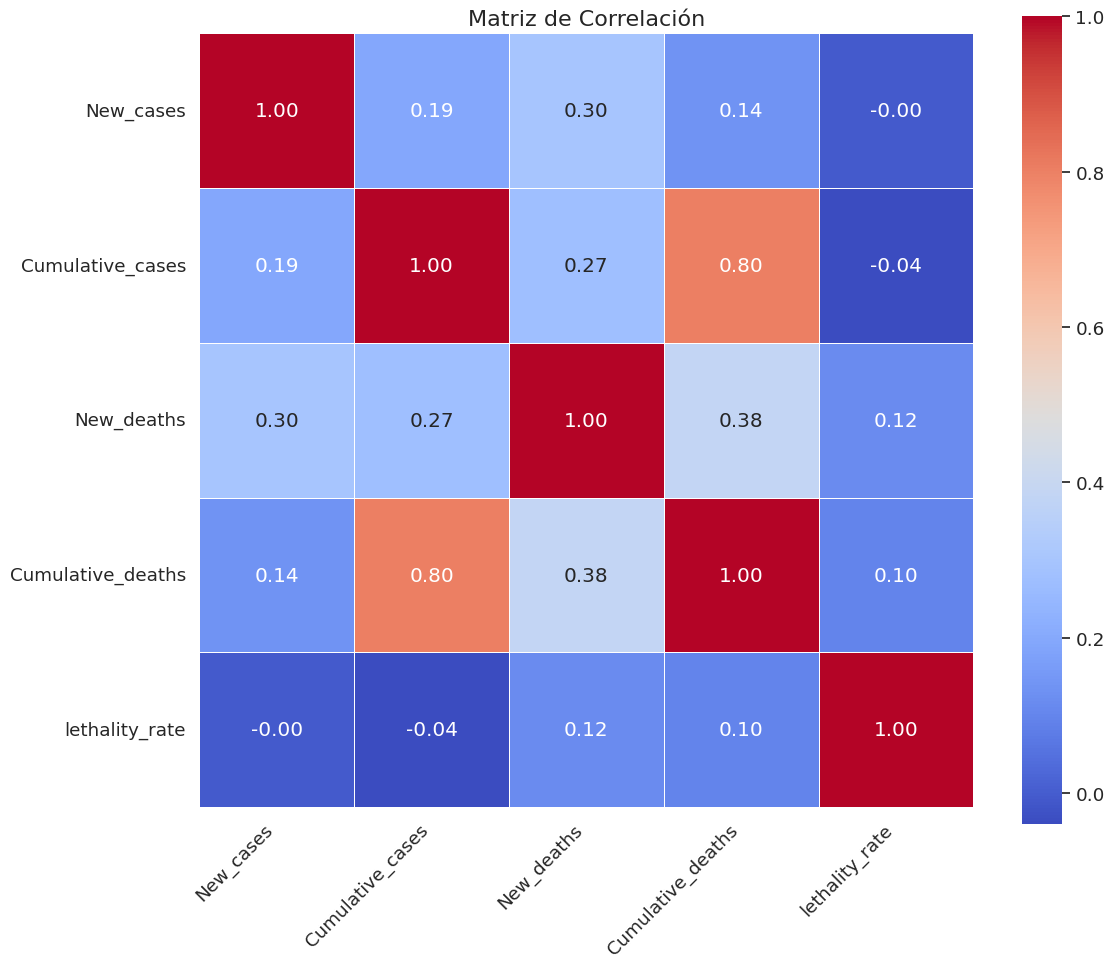

In [69]:
# Filtrar las columnas numéricas
df_numeric = df_covid_limpio.select_dtypes('number')

# Calcular la matriz de correlación
correlation_matrix = df_numeric.corr()

# Ajustes para mejorar la apariencia del gráfico
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.2)  # Ajustar el tamaño de la fuente
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5, square=True)
plt.title('Matriz de Correlación', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mejorar la legibilidad
plt.yticks(rotation=0)  # Mantener las etiquetas del eje y en posición horizontal
plt.tight_layout()  # Ajustar el diseño para evitar cortar etiquetas
plt.show()

In [84]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_cases'] / datos_agrupados['Cumulative_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Casos Acumulados por país (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='blue'),  # Cambiar la fuente y el color
                  xaxis_title='Casos Acumulados',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos acumalados y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos acumulados de casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [87]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_cases'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_cases']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_cases'] / datos_agrupados['New_cases'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_cases', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Nuevos Casos (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='blue'),  # Cambiar la fuente y el color
                  xaxis_title='Cantidad Nuevos Casos',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas casos nuevos  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos india y china son los paises con porcentajes mas altos de nuevos casos por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de colombia

In [90]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['Cumulative_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['Cumulative_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['Cumulative_deaths'] / datos_agrupados['Cumulative_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='Cumulative_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='Cumulative_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='blue'),  # Cambiar la fuente y el color
                  xaxis_title='Cumulative_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas muertes acumuladas  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india son los paises con porcentajes mas altos de muertes acumuladas por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y en este caso colombia es el que menos muertes acumuladas tiene

In [91]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['lethality_rate'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['lethality_rate']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['lethality_rate'] / datos_agrupados['lethality_rate'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='lethality_rate', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='lethality_rate (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='blue'),  # Cambiar la fuente y el color
                  xaxis_title='lethality_rate',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas casos mas indice de letalidad  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Sudan peru y  y china son los paises con porcentajes mas altos de letalidad
2. los paises obejtivos que estamos evaluando Peru es el que tiene el porcentaje mas alto de los 3 seguido de mexico y de ultimo colombia, aunque esto se debe presentar por un rango de acuerdo a su poblacion

In [93]:
import plotly.express as px

# Obtener el top 10 de países y países a evaluar y comparar
top_paises = df_covid_limpio.groupby('Country')['New_deaths'].sum().nlargest(10).index
paises_adicionales = ['Colombia', 'Mexico', 'Peru']

# Filtrar el DataFrame para incluir solo el top 10 y países a evaluar y comparar
datos = df_covid_limpio[df_covid_limpio['Country'].isin(top_paises) | df_covid_limpio['Country'].isin(paises_adicionales)]

# Agrupar y sumar Cumulative_cases
datos_agrupados = datos.groupby('Country')[['New_deaths']].sum().reset_index()

# Calcular el porcentaje de cada valor con respecto al total y redondear a dos decimales
datos_agrupados['porcentaje'] = datos_agrupados['New_deaths'] / datos_agrupados['New_deaths'].sum() * 100
datos_agrupados['porcentaje'] = datos_agrupados['porcentaje'].round(2).astype(str) + '%'

# Crear el gráfico de barras horizontal con etiquetas de porcentaje
fig = px.bar(datos_agrupados, x='New_deaths', y='Country', color='Country',
             text='porcentaje',  # Usar el porcentaje como etiquetas de texto
             color_discrete_sequence=px.colors.qualitative.Set3,
             orientation='h')  # Mantener la orientación horizontal

# Configuración adicional del diseño
fig.update_layout(title='New_deaths (Top 10 + Colombia, México, Perú)',
                  title_font=dict(size=20, family='Arial', color='blue'),  # Cambiar la fuente y el color
                  xaxis_title='New_deaths',
                  yaxis_title='País',
                  legend_title='País',
                  yaxis=dict(categoryorder='total ascending'))  # Ordenar las categorías de mayor a menor)

# Mostrar el gráfico
fig.show(renderer="colab")

En este grafico logramos identificar el top 10 de paises con mas nuevas muertes  y agregamos a esta grafica los 3 paises objetivos que compararemos mas adelante

1. Podemos observar que Estados Unidos brazil e india  son los paises con porcentajes mas altos de nuevas muertes por pais
2. los paises obejtivos que estamos evaluando Mexico es el que tiene el porcentaje mas alto de los 3 seguido de peru y de ultimo caso colombia

In [98]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agrupar por fecha y sumar las métricas
date_c = df_covid_limpio.groupby('Date_reported')['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()

# Crear subgráficos
fig = make_subplots(rows=1, cols=5, subplot_titles=('New Cases', 'Cumulative Cases', 'New Deaths', 'Cumulative Deaths', 'Lethality Rate'))

# Crear trazas
trace1 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_cases'], name="New Cases", line_color='orange', mode='lines+markers', opacity=0.8)
trace2 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_cases'], name="Cumulative Cases", line_color='red', mode='lines+markers', opacity=0.8)
trace3 = go.Scatter(x=date_c['Date_reported'], y=date_c['New_deaths'], name="New Deaths", mode='lines+markers', line_color='green', opacity=0.8)
trace4 = go.Scatter(x=date_c['Date_reported'], y=date_c['Cumulative_deaths'], name="Cumulative Deaths", line_color='blue', mode='lines+markers', opacity=0.8)
trace5 = go.Scatter(x=date_c['Date_reported'], y=date_c['lethality_rate'], name="Lethality Rate", line_color='purple', mode='lines+markers', opacity=0.8)

# Añadir trazas a los subgráficos
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)
fig.add_trace(trace3, row=1, col=3)
fig.add_trace(trace4, row=1, col=4)
fig.add_trace(trace5, row=1, col=5)

# Configuración del diseño
fig.update_layout(template="plotly_dark", title_text='<b>Propagación mundial del coronavirus a lo largo del tiempo</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show();


<ipython-input-98-4637aaf15fed>:5: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Con este grafico podemos analizar todo nuestro data set de una manera mas grafica evaluando atravez del tiempo    y donde podemos generar los siguientes analisis

1. **New Cases:** Se observa una tendencia ascendente entre los años 2021 y 2022, seguida de un descenso en los índices. Sin embargo, a partir del año 2023, se evidencia un crecimiento nuevamente, seguido de una disminución significativa para el año 2024, alcanzando índices muy bajos.

2. **Cumulative_cases** para el 2024 el total de casos acumulados llega a  mas 774 millones de personas que sufrieron covid

3. **New_deaths** en este caso observamos que el pico fuerte de muertes fue durante el periodo del 2020 al 2023 ya para el 2024 la cantidad de muertes es muy baja

4. **Cumulative_deaths** Para la muertes acumuladas se esta por encima de los 7 millones de personas fallecidas desde que empezo el covid

5. **lethality_rate** el indice de letalidad para esta fechas es muy bajo

In [113]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Filtrar DataFrame para los países específicos
paises_seleccionados = ['Mexico', 'Colombia', 'Peru']
df_seleccionados = df_covid_limpio[df_covid_limpio['Country'].isin(paises_seleccionados)]

# Crear subgráfico
fig = make_subplots(rows=1, cols=4, subplot_titles=("Cumulative_cases", "Cumulative_deaths", "lethality_rate", 'New_cases'))

# Crear trazas para cada país
for pais in paises_seleccionados:
    df_pais = df_seleccionados[df_seleccionados['Country'] == pais]
    trace1 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_cases'], name=f"{pais} - Cumulative_cases", mode='lines+markers', opacity=0.8)
    trace2 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['Cumulative_deaths'], name=f"{pais} - Cumulative_deaths", mode='lines+markers', opacity=0.8)
    trace3 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['lethality_rate'], name=f"{pais} - lethality_rate", mode='lines+markers', opacity=0.8)
    trace4 = go.Scatter(x=df_pais['Date_reported'], y=df_pais['New_cases'], name=f"{pais} - New_cases", mode='lines+markers', opacity=0.8)

    # Añadir trazas al gráfico
    fig.append_trace(trace1, 1, 1)
    fig.append_trace(trace2, 1, 2)
    fig.append_trace(trace3, 1, 3)
    fig.append_trace(trace4, 1, 4)

# Configuración adicional del diseño
fig.update_layout(template="plotly_dark", title_text='<b>COVID-19 en México, Colombia y Perú</b>',
                  font=dict(family="Arial, Balto, Courier New, Droid Sans", color='white'))

# Mostrar el gráfico
fig.show()


In [118]:
temp = df_covid_limpio.groupby('Date_reported')['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'].sum().reset_index()
temp = temp.melt(id_vars="Date_reported", value_vars=['Cumulative_cases', 'Cumulative_deaths', 'lethality_rate'],
                 var_name='case', value_name='count')


fig = px.area(temp, x="Date_reported", y="count", color='case',
             title='Casos x Tiempo: Area Plot', color_discrete_sequence = ['cyan', 'red', 'orange'])
fig.show()

<ipython-input-118-d71843e62862>:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [126]:
import plotly.express as px

formated_gdf = df_covid_limpio.groupby(['Date_reported', 'Country'])['Cumulative_cases', 'Cumulative_deaths'].max()
formated_gdf = formated_gdf.reset_index()
formated_gdf['Date_reported'] = pd.to_datetime(formated_gdf['Date_reported'])
formated_gdf['Date_reported'] = formated_gdf['Date_reported'].dt.strftime('%m/%d/%Y')
formated_gdf['size'] = formated_gdf['Cumulative_cases'].pow(0.3)

fig = px.scatter_geo(formated_gdf,
                     locations="Country",
                     locationmode='country names',
                     color="Cumulative_cases",
                     size='size',
                     hover_name="Country",
                     range_color=[0, 1500],
                     projection="natural earth",
                     animation_frame="Date_reported",
                     title='COVID-19: Spread Over Time',
                     color_continuous_scale="Viridis",  # Cambié la paleta de colores
                     labels={'Cumulative_cases': 'Casos Acumulados'},
                     template="plotly_dark"  # Utilicé un fondo oscuro
                     )

# Añadir una barra de color y etiquetas informativas
fig.update_layout(coloraxis_colorbar=dict(title='Casos Acumulados', tickvals=[0, 500, 1000, 1500]))

# Ajustar tamaño y visualización
fig.update_traces(marker=dict(line=dict(width=0.5, color='white')))

# Añadir información al título
fig.update_layout(title_text='<b>COVID-19: Distribución temporal (10 países principales)</b>',
                  title_font=dict(size=20, family='Arial', color='blue'))

fig.show()



<ipython-input-126-147f915c1a6d>:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



# EDA Base Population United Nations

In [127]:
df_population.sample(5)

Index    Variant Region, subregion, country or area * Notes  \
8353   8354  Estimates                            Indonesia   NaN   
1729   1730  Estimates                       Eastern Africa   NaN   
8065   8066  Estimates                            Sri Lanka   NaN   
7561   7562  Estimates                           Bangladesh   NaN   
2737   2738  Estimates                           Seychelles   NaN   

      Location code ISO3 Alpha-code ISO2 Alpha-code  SDMX code**  \
8353            360             IDN              ID        360.0   
1729            910             NaN             NaN         14.0   
8065            144             LKA              LK        144.0   
7561             50             BGD              BD         50.0   
2737            690             SYC              SC        690.0   

              Type  Parent code  ...  \
8353  Country/Area          920  ...   
1729     Subregion          903  ...   
8065  Country/Area         5501  ...   
7561  Country/Area         5501  ...   
2737  Country/Area          910  ...   

      Male Mortality before Age 60 (deaths under age 60 per 1,000 male live births)  \
8353                                            218.033                               
1729                                            352.885                               
8065                                            165.798                               
7561                                            184.172                               
2737                                            201.926                               

     Female Mortality before Age 60 (deaths under age 60 per 1,000 female live births)  \
8353                                            164.718                                  
1729                                            265.559                                  
8065                                             76.058                                  
7561                                            124.123                                  
2737                                              94.32                                  

     Mortality between Age 15 and 50, both sexes (deaths under age 50 per 1,000 alive at age 15)  \
8353                                              79.24                                            
1729                                            150.791                                            
8065                                             50.796                                            
7561                                             59.853                                            
2737                                             60.699                                            

     Male Mortality between Age 15 and 50 (deaths under age 50 per 1,000 males alive at age 15)  \
8353                                             88.333                                           
1729                                            177.284                                           
8065                                             70.734                                           
7561                                             70.756                                           
2737                                             83.496                                           

     Female Mortality between Age 15 and 50 (deaths under age 50 per 1,000 females alive at age 15)  \
8353                                             69.754                                               
1729                                            124.292                                               
8065                                             31.666                                               
7561                                             49.758                                               
2737                                             32.781                                               

     Mortality between Age 15 and 60, both sexes (deaths under

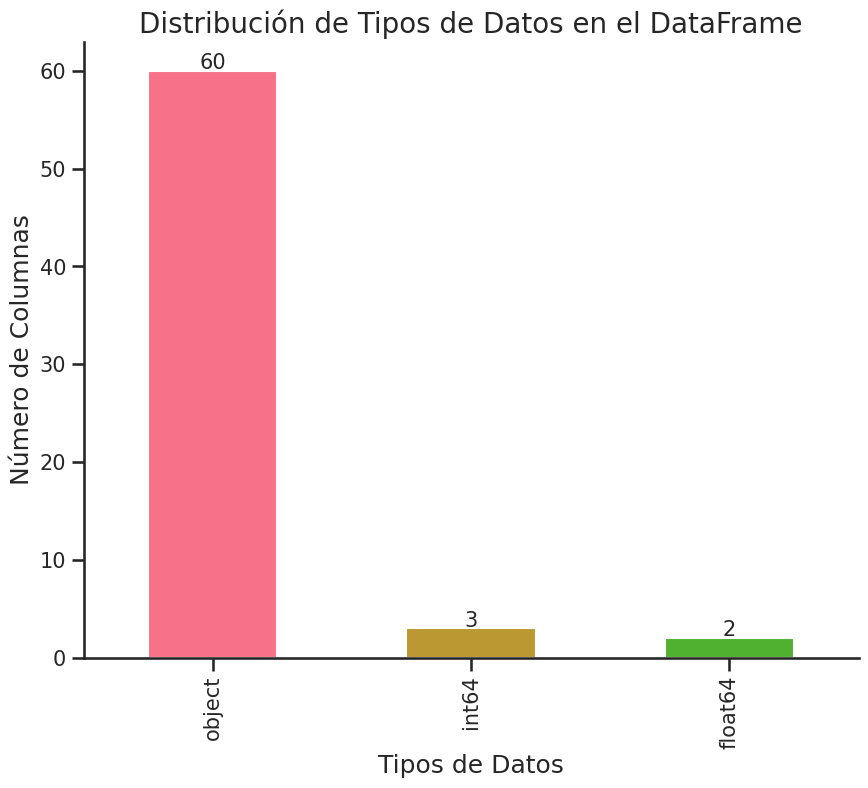

In [128]:
# Establecemos el estilo de Seaborn
sns.set(style="ticks", context="talk", font_scale=1, palette="husl")
# Creamos una figura de tamaño personalizado
plt.figure(figsize=(10, 8))
# Contamos los tipos de datos y creamos un gráfico de barras
ax = df_population.dtypes.value_counts().plot(kind='bar', color=sns.color_palette("husl"), grid=False, fontsize=15)
# Etiquetamos las barras con el recuento de cada tipo de dato
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.2, height, ha='center', size=15)
# Personalizamos el gráfico
ax.set_xlabel("Tipos de Datos", fontsize=18)
ax.set_ylabel("Número de Columnas", fontsize=18)
ax.set_title("Distribución de Tipos de Datos en el DataFrame", fontsize=20)
# Eliminamos los bordes desagradables
sns.despine()
# Mostramos el grafico el gráfico
plt.show()

In [129]:
#Información de los datos
print("Número de filas: ",df_population.shape[0])
print("Número de Columnas:",df_population.shape[1])
print("Datos Duplicados",df_population.duplicated().sum())
print("Variables Categóricas: ",df_population.select_dtypes(include='object').shape[1])
print("Variables Numéricas: ",df_population.select_dtypes(exclude='object').shape[1])

Número de filas:  286
Número de Columnas: 65
Datos Duplicados 0
Variables Categóricas:  60
Variables Numéricas:  5


* Validamos que tenemos 65 columnas y 286 filas
* Evaluaremos que columnas serán más importantes para nuestros análisis

In [130]:
## Realizamos una visión general de nuestros tipos de datos
df_population.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 65 columns):
 #   Column                                                                                          Non-Null Count  Dtype  
---  ------                                                                                          --------------  -----  
 0   Index                                                                                           286 non-null    int64  
 1   Variant                                                                                         286 non-null    object 
 2   Region, subregion, country or area *                                                            286 non-null    object 
 3   Notes                                                                                           76 non-null     object 
 4   Location code                                                                                   286 non-null    int64  
 5   ISO3 Alpha-c

Mantener en el dataframe sólo las siguientes columnas: ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']

In [131]:
#Listamos de columnas que deseas mantener
columnas_a_mantener = ['ISO2 Alpha-code','Total Population, as of 1 July (thousands)','Male Population, as of 1 July (thousands)','Female Population, as of 1 July (thousands)','Population Density, as of 1 July (persons per square km)','Life Expectancy at Birth, both sexes (years)']
# Crear un nuevo DataFrame con solo las columnas deseadas
df_population_limpio = df_population[columnas_a_mantener]
# Mostramos las primeras filas del DataFrame resultante
df_population_limpio.sample(5)

ISO2 Alpha-code Total Population, as of 1 July (thousands)  \
16849              HN                                   9958.829   
15625              MQ                                    372.245   
14977              KY                                     66.134   
1657              NaN                                1327701.163   
7993               PK                                  223293.28   

      Male Population, as of 1 July (thousands)  \
16849                                  5031.794   
15625                                   171.618   
14977                                    33.285   
1657                                 662826.917   
7993                                 113015.042   

      Female Population, as of 1 July (thousands)  \
16849                                    4927.035   
15625                                     200.626   
14977                                      32.849   
1657                                   664874.245   
7993                                   110278.237   

      Population Density, as of 1 July (persons per square km)  \
16849                                             91.303         
15625                                            351.174         
14977                                            274.415         
1657                                              44.929         
7993                                              289.66         

      Life Expectancy at Birth, both sexes (years)  
16849                                       72.881  
15625                                       82.778  
14977                                       75.068  
1657                                        62.688  
7993                                        66.756

Renombrar las columnas para nombre más sencillos:

In [132]:
# Utilizando el método .rename() para cambiar el nombre de las columnas en un DataFrame
# Cambiar el nombre de las columnas especificadas
df_population_limpio = df_population_limpio.rename(columns={
    'ISO2 Alpha-code': 'Country_code',
    'Total Population, as of 1 July (thousands)': 'Total_Population',
    'Male Population, as of 1 July (thousands)': 'Male_Population',
    'Female Population, as of 1 July (thousands)': 'Female_Population',
    'Population Density, as of 1 July (persons per square km)': 'Population_Density',
    'Life Expectancy at Birth, both sexes (years)': 'Life_Expectancy'
})
df_population_limpio.sample(5)

Country_code Total_Population Male_Population Female_Population  \
6841            CN      1421864.031      726781.914        695082.117   
2377            MU         1296.279         640.524           655.755   
1296           NaN      5814477.644     2934750.996       2879726.647   
16345           TC            43.08          21.739            21.341   
2521            MZ        30285.595       14851.787         15433.808   

      Population_Density Life_Expectancy  
6841             148.111          77.968  
2377             638.561          75.118  
1296              73.229          72.028  
16345             45.347          75.326  
2521              38.513          61.166

In [133]:
df_population_limpio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 69 to 20593
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country_code        236 non-null    object
 1   Total_Population    286 non-null    object
 2   Male_Population     286 non-null    object
 3   Female_Population   286 non-null    object
 4   Population_Density  286 non-null    object
 5   Life_Expectancy     286 non-null    object
dtypes: object(6)
memory usage: 15.6+ KB


Eliminar todos los registros nulos.

In [134]:
#datos nulos por columna
df_population_limpio.isnull().sum().sort_values(ascending=False)

Country_code          50
Total_Population       0
Male_Population        0
Female_Population      0
Population_Density     0
Life_Expectancy        0
dtype: int64

Text(0, 0.5, 'Filas')

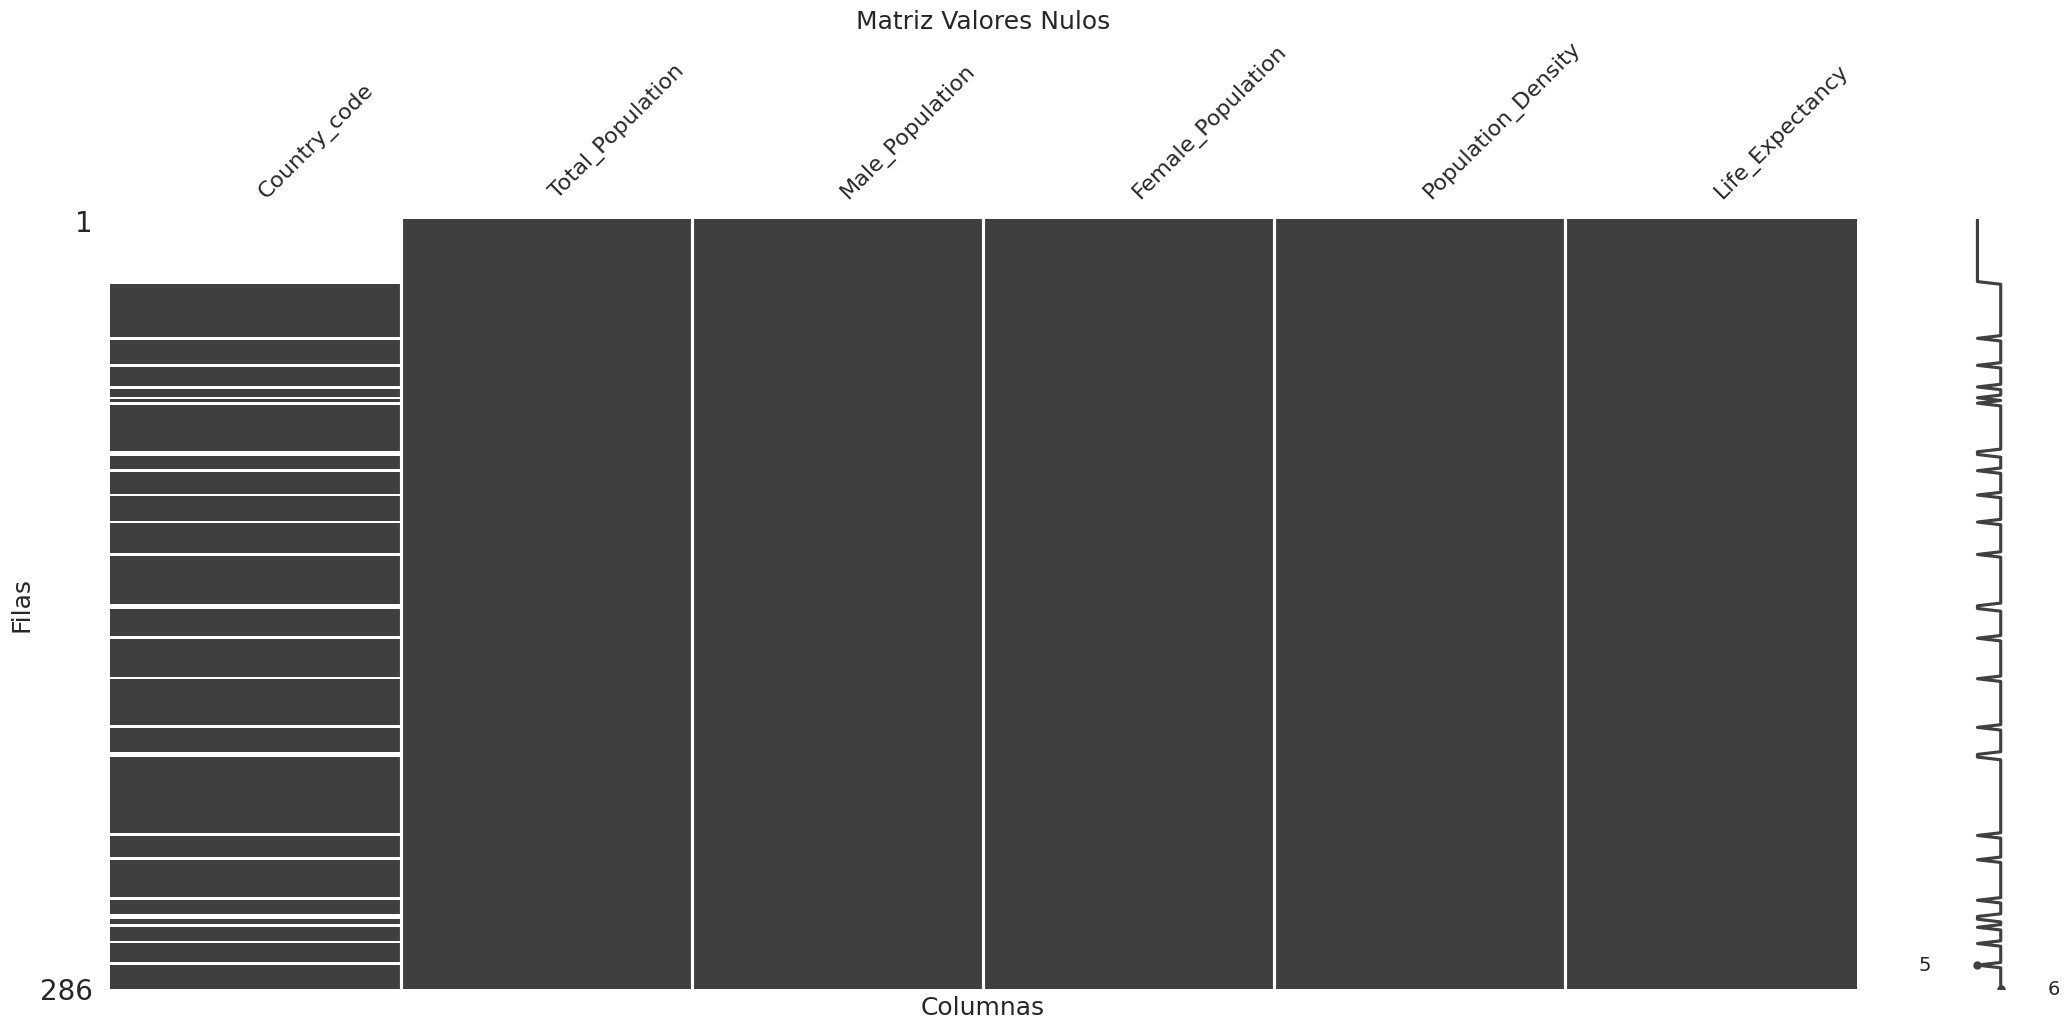

In [135]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

In [136]:
# Eliminar todas las filas que contienen al menos un valor nulo
df_population_limpio = df_population_limpio.dropna()

Text(0, 0.5, 'Filas')

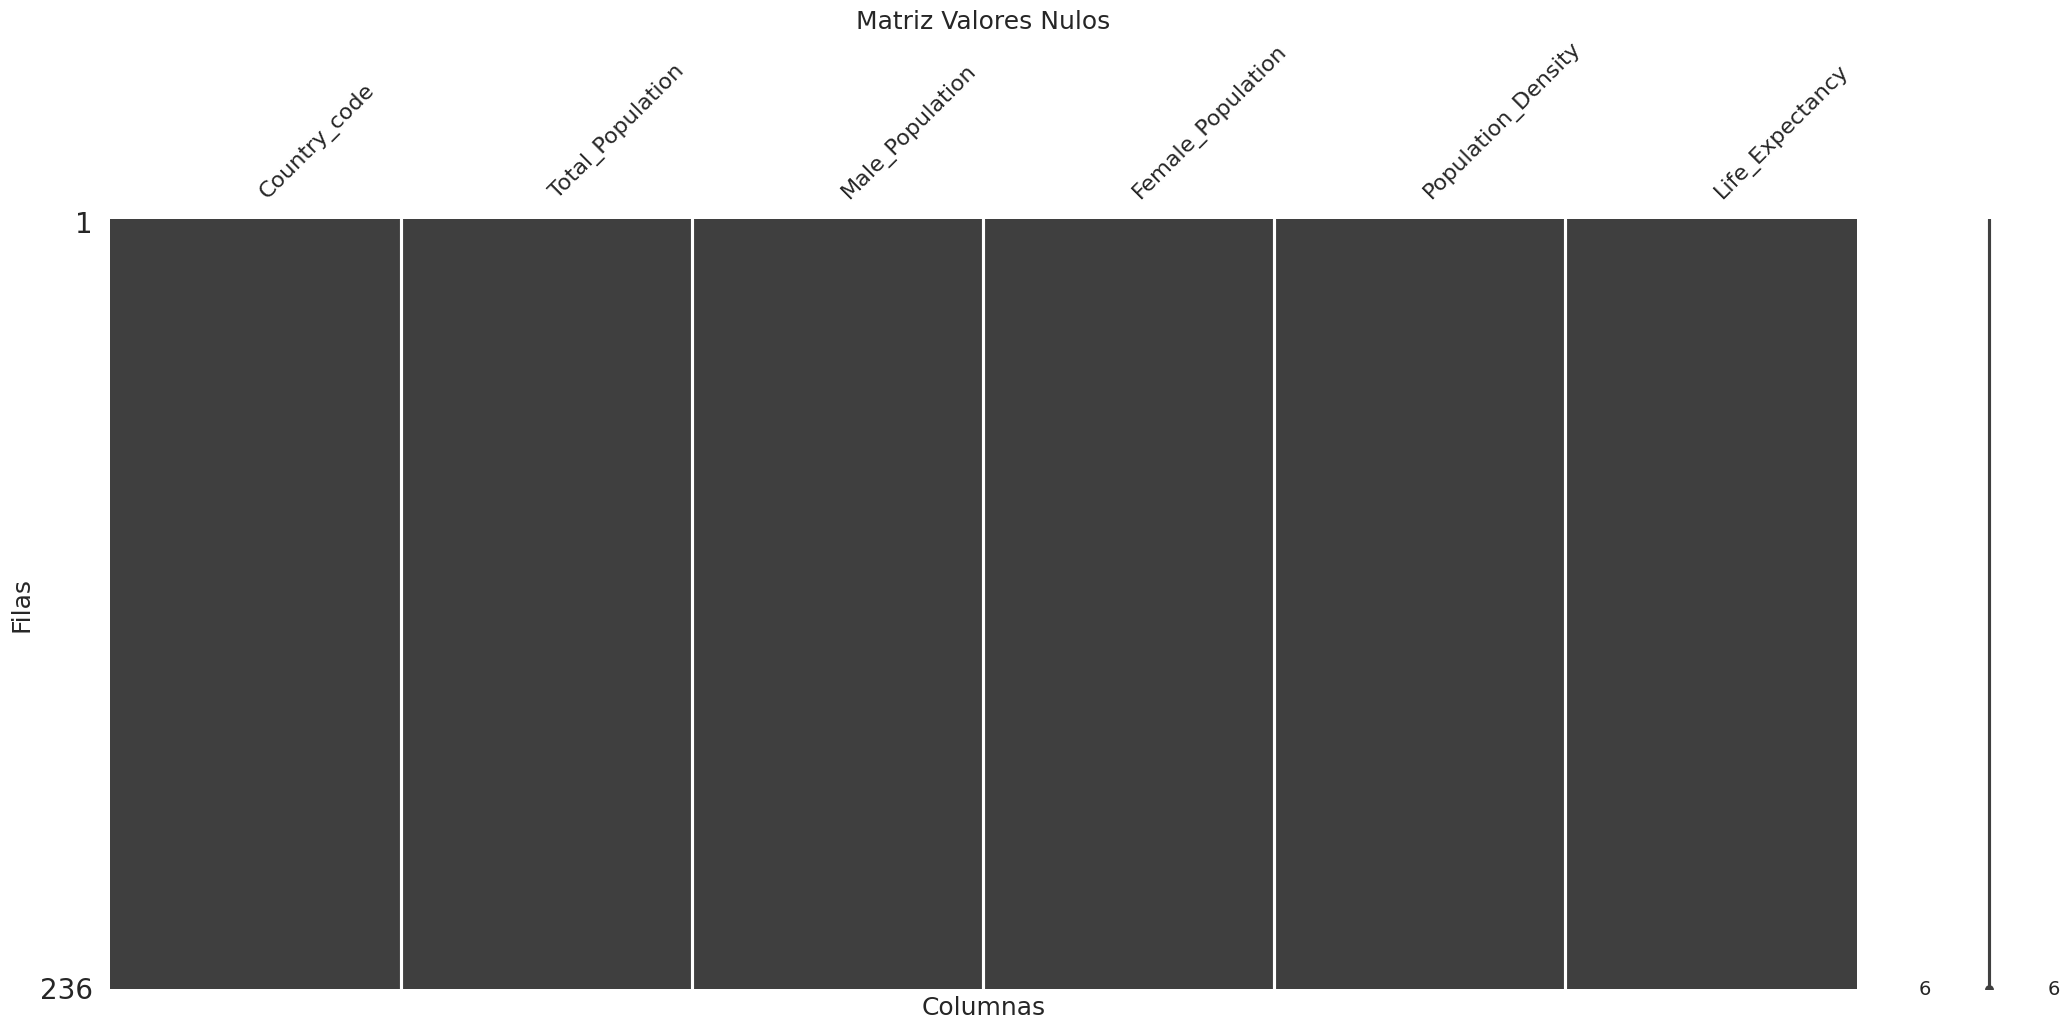

In [137]:
# Visualización con seaborn de los valores nulos
msno.matrix(df_population_limpio)
plt.title('Matriz Valores Nulos')
plt.xlabel('Columnas')
plt.ylabel('Filas')

Substituir el formato actual de las columnas
['Total_Population','Male_Population','Female_Population','Population_Density','Life_Expectancy']para un formato de tipo int64.

los campos que necesitamos convertir tienen valores pero hay valores no enteros en la columna que estamos tratando de convertir.

In [138]:
# Columnas que deseas convertir
columns_to_convert = ['Total_Population', 'Male_Population', 'Population_Density', 'Life_Expectancy']

# Manejar los NaN y valores no numéricos
for column in columns_to_convert:
    df_population_limpio[column] = pd.to_numeric(df_population_limpio[column], errors='coerce')

# Lidiar con NaN asignando un valor predeterminado
fill_value = 0  # Puedes cambiar esto al valor que desees
df_population_limpio[columns_to_convert] = df_population_limpio[columns_to_convert].fillna(fill_value)

In [139]:
# Verificar el tipo de dato después de la conversión
print("Tipo de dato después de la conversión de Total_Population:", df_population_limpio['Total_Population'].dtype)
print("Tipo de dato después de la conversión de Male_Population:", df_population_limpio['Male_Population'].dtype)
print("Tipo de dato después de la conversión de Population_Density:", df_population_limpio['Population_Density'].dtype)
print("Tipo de dato después de la conversión de Life_Expectancy:", df_population_limpio['Life_Expectancy'].dtype)


Tipo de dato después de la conversión de Total_Population: float64
Tipo de dato después de la conversión de Male_Population: float64
Tipo de dato después de la conversión de Population_Density: float64
Tipo de dato después de la conversión de Life_Expectancy: float64


Multiplicar por 1000 el valor actual de las siguientes columnas 'Total_Population','Male_Population','Female_Population' y sobreescribirlas.

Substituir todos los valores nulos con cero.

In [140]:
# Multiplicar por 1000 y sobreescribir las columnas
columns_to_multiply = ['Total_Population', 'Male_Population', 'Female_Population']

df_population_limpio[columns_to_multiply] = df_population_limpio[columns_to_multiply] * 1000

# Substituir los valores nulos con cero
df_population_limpio = df_population_limpio.fillna(0)


Substituir todos los valores nulos con cero.

Finalmente reiniciaremos el índice del dataframe final df_population_limpio

In [141]:
#Reiniciar el índice del DataFrame
df_population_limpio = df_population_limpio.reset_index(drop=True)
# Mostramos 5 filas del DataFrame resultante
df_population_limpio.head(5)

Country_code  Total_Population  Male_Population Female_Population  \
0           BI        11874838.0        5894278.0         5980560.0   
1           KM          790986.0         397126.0          393860.0   
2           DJ         1073994.0         533626.0          540367.0   
3           ER         3498818.0        1724860.0         1773958.0   
4           ET       114120594.0       57375433.0        56745161.0   

   Population_Density  Life_Expectancy  
0             457.605           62.351  
1             425.033           64.068  
2              46.333           63.085  
3              28.881           67.300  
4             114.121           65.838

# 3. Planteamiento de Preguntas

#Pregunta 1



> ¿Cómo ha evolucionado el Covid-19 en el país en comparación con el impacto observado a nivel global?






Para realizar este análisis necesitamos construir 2 bases de datos diferentes para los 2 gráficos mostrados:

**Worldwide Cases Distribution**

Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado con México
#total_por_pais_con_mexico = total_por_pais.head(10).append(pd.Series({'Mexico': df_covid_limpio[df_covid_limpio['Country'] == 'Mexico']['Cumulative_cases'].max()}))

# Mostrar el resultado final
print(total_por_pais)

Country
United States of America                 103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64


Luego, seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.

In [ ]:
# Seleccionar los 10 primeros países
top_10_paises = total_por_pais.head(10)
# Mostrar el resultado
print(top_10_paises)

Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64


Retiro de la variable total_por_pais los 10 países identificados en top_10_paises, así tendré una Series con todos los demás países fuera del top 10, sumo todos los valores restantes de total_por_pais y lo almaceno en la variable otros.

In [ ]:
# Seleccionar los 10 primeros países y guardar el resultado en top_10_paises
top_10_paises = total_por_pais.head(10)

# Retirar los 10 países identificados en top_10_paises de total_por_pais
otros = total_por_pais.drop(top_10_paises.index)

# Sumar todos los valores restantes y almacenar en la variable otros
suma_otros = otros.sum()

# Mostrar los resultados
print("Top 10 países:")
print(top_10_paises)

print("\nPaíses fuera del top 10:")
print(otros)

print("\nSuma de valores para países fuera del top 10:", suma_otros)


Top 10 países:
Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Name: Cumulative_cases, dtype: int64

Países fuera del top 10:
Country
Russian Federation                       23773710
Türkiye                                  17004677
Spain                                    13980340
Australia                                11752647
Viet Nam                                 11624

Finalmente, creo un nuevo registro llamado 'Otros' en top_10_paises con el valor de la variable otros

In [ ]:
# Agregar un nuevo registro 'Otros' en top_10_paises con el valor de la variable otros
top_10_paises['Otros'] = suma_otros

# Mostrar el resultado final
print(top_10_paises)


Country
United States of America                                103436829
China                                                    99326423
India                                                    45023751
France                                                   38997490
Germany                                                  38437756
Brazil                                                   37519960
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26693706
United Kingdom of Great Britain and Northern Ireland     24885790
Otros                                                   291519855
Name: Cumulative_cases, dtype: int64


# Case Progression by Country

In [ ]:
# Agrupar por país y obtener el máximo valor de Cumulative_cases
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max()

# Ordenar descendentemente
total_por_pais = total_por_pais.sort_values(ascending=False)

# Mostrar el resultado
print(total_por_pais)


Country
United States of America                 103436829
China                                     99326423
India                                     45023751
France                                    38997490
Germany                                   38437756
                                           ...    
Holy See                                        26
Pitcairn                                         4
Yemen                                            1
Turkmenistan                                     0
Democratic People's Republic of Korea            0
Name: Cumulative_cases, Length: 233, dtype: int64


Luego, seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.

In [ ]:
# Seleccionar los 5 primeros países
top_5_paises = total_por_pais.head(5)

# Mostrar el resultado
print(top_5_paises)

Country
United States of America    103436829
China                        99326423
India                        45023751
France                       38997490
Germany                      38437756
Name: Cumulative_cases, dtype: int64


Reiniciamos el índice de df_covid_limpio y lo almacenamos en df_covid_limpio_reset.

In [ ]:
# Reiniciar el índice y almacenar en df_covid_limpio_reset
df_covid_limpio_reset = df_covid_limpio.reset_index(drop=True)


De este nuevo dataframe df_covid_limpio_reset mantengo sólo los registros cuyo país esté dentro de top_5_paises.

In [ ]:
# Filtrar los registros por país en top_5_paises
df_covid_limpio_top5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

# Mostrar el nuevo DataFrame resultante
df_covid_limpio_top5.sample(5)

Date_reported Country_code                   Country  New_cases  \
16452    2020-04-12           DE                   Germany      27145   
15293    2022-04-10           FR                    France     928373   
46939    2023-02-19           US  United States of America     254372   
16462    2020-06-21           DE                   Germany       4192   
9040     2023-08-20           CN                     China       1463   

       Cumulative_cases  New_deaths  Cumulative_deaths  lethality_rate  
16452            127116        1878               6196        4.874288  
15293          26004483         788             144136        0.554274  
46939         101752396        2857            1106783        1.087722  
16462            190976          41               9256        4.846682  
9040           99304082           0             121671        0.122524

Finalmente, realizamos un pivot sobre df_top_5 para tener los países como índices y las fechas como columnas, y almacenamos el resultado en total_acumulado_top_5.

In [ ]:
# Pivot sobre df_covid_limpio_top5
total_acumulado_top_5 = df_covid_limpio_top5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases')

# Mostrar el resultado
total_acumulado_top_5.sample(5)


Date_reported             2020-01-05  2020-01-12  2020-01-19  2020-01-26  \
Country                                                                    
Germany                          NaN         NaN         NaN         NaN   
China                            1.0        45.0       125.0      1985.0   
United States of America         0.0         0.0         0.0         7.0   
France                           0.0         0.0         0.0         3.0   
India                            0.0         0.0         0.0         0.0   

Date_reported             2020-02-02  2020-02-09  2020-02-16  2020-02-23  \
Country                                                                    
Germany                          NaN         NaN         NaN         NaN   
China                        14411.0     37251.0     68584.0     77042.0   
United States of America         9.0        20.0        24.0        40.0   
France                           6.0        12.0        12.0        16.0   
India                            2.0         7.0         7.0         7.0   

Date_reported             2020-03-01  2020-03-08  ...   2023-11-19  \
Country                                           ...                
Germany                        170.0      1075.0  ...   38437756.0   
China                        79968.0     80859.0  ...   99320035.0   
United States of America        73.0       464.0  ...  103436829.0   
France                          16.0        16.0  ...   38997490.0   
India                            7.0        39.0  ...   45001575.0   

Date_reported              2023-11-26   2023-12-03   2023-12-10   2023-12-17  \
Country                                                                        
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
China                      99320425.0   99320845.0   99321242.0   99321637.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
India                      45001764.0   45002179.0   45003055.0   45004816.0   

Date_reported              2023-12-24   2023-12-31   2024-01-07   2024-01-14  \
Country                                                                        
Germany                    38437756.0   38437756.0   38437756.0   38437756.0   
China                      99322142.0   99322727.0   99323756.0   99325108.0   
United States of America  103436829.0  103436829.0  103436829.0  103436829.0   
France                     38997490.0   38997490.0   38997490.0   38997490.0   
India                      45008620.0   45013172.0   45018134.0   45021758.0   

Date_reported              2024-01-21  
Country                                
Germany                    38437756.0  
China                      99326423.0  
United States of America  103436829.0  
France                     38997490.0  
India                      45023751.0  

[5 rows x 212 columns]

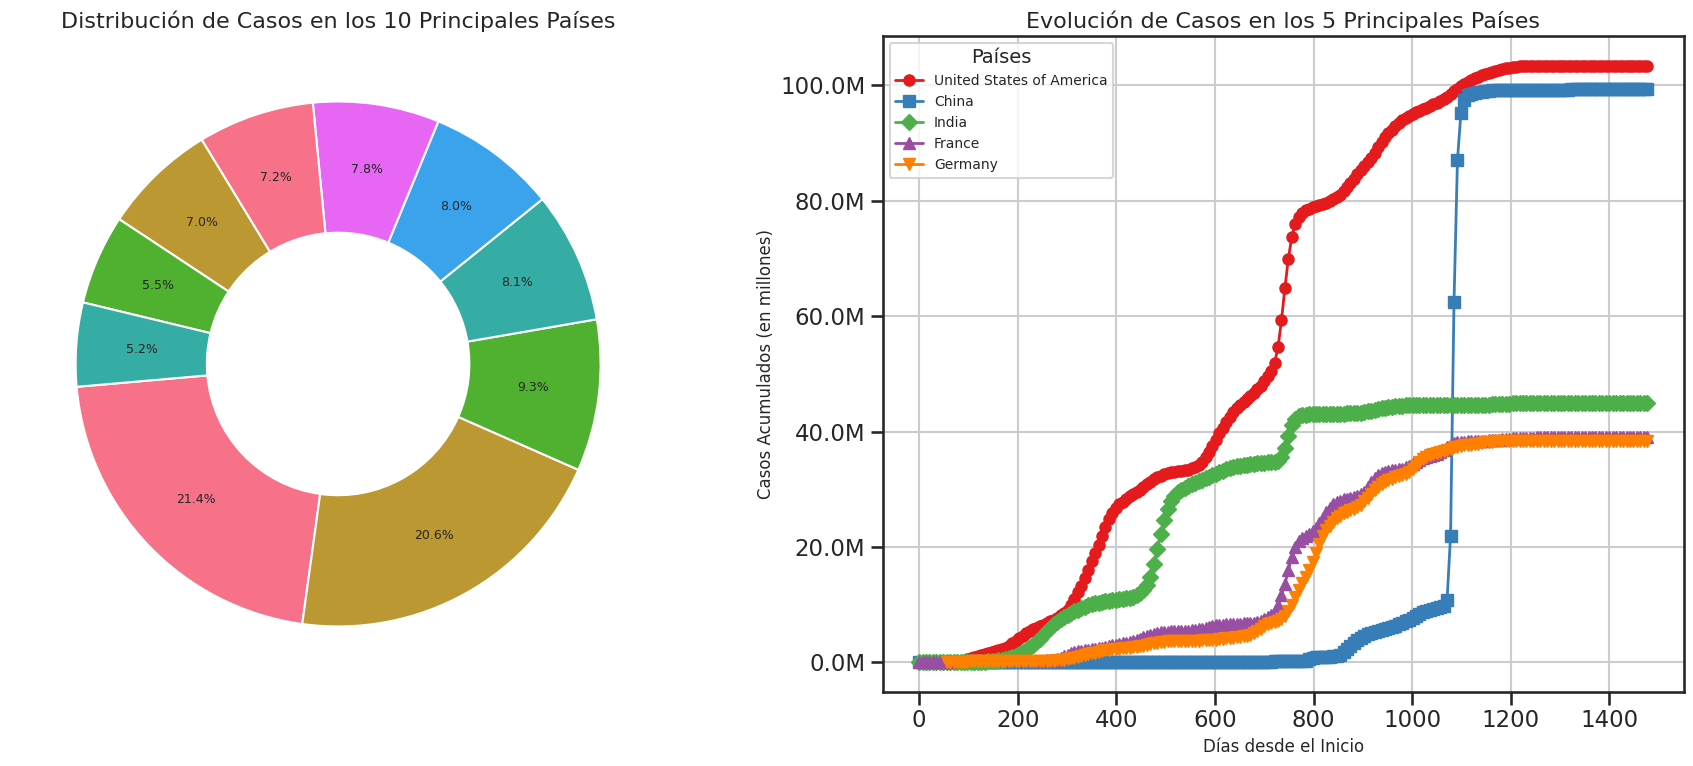

In [ ]:
# Gráfico de Donuts y Líneas mejorado
fig, axs = plt.subplots(1, 2, figsize=(18, 8))

# Gráfico de Donuts
wedges, texts, autotexts = axs[0].pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9}, pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'))
axs[0].set_title('Distribución de Casos en los 10 Principales Países', fontsize=16)
legend_donut = axs[1].legend(top_10_paises.index, title="Países", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
legend_donut.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

# Gráfico de Líneas
colors_lines = sns.color_palette('Set1')[0:len(top_5_paises)]
for pais, color, marker in zip(top_5_paises.index, colors_lines, ['o', 's', 'D', '^', 'v']):
    axs[1].plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais, color=color, linewidth=2, marker=marker, markersize=8)

axs[1].set_title('Evolución de Casos en los 5 Principales Países', fontsize=16)
axs[1].set_xlabel('Días desde el Inicio', fontsize=12)
axs[1].set_ylabel('Casos Acumulados (en millones)', fontsize=12)
legend_lines = axs[1].legend(title="Países", fontsize=10)
legend_lines.get_title().set_fontsize('14')  # Ajustar tamaño de la fuente de la leyenda

axs[1].get_yaxis().set_major_formatter(FuncFormatter(millones_formatter))

# Añadir cuadrícula al gráfico de líneas
axs[1].grid(True)

plt.tight_layout()
plt.show()